# Support Vector Regression (SVR) Implementation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Create Dataset
from sklearn.datasets import make_regression

In [3]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [4]:
X

array([[ 1.48930696,  0.10524931],
       [ 0.78141353, -0.16204863],
       [-0.64887752,  1.27298169],
       ...,
       [ 1.58820654, -1.51767255],
       [-0.58336684, -0.13039084],
       [-0.56105389, -1.17603146]])

In [5]:
y

array([ 7.42621665e+01,  1.88568199e+01,  6.30027350e+01, -1.27343575e+02,
       -1.52388647e+02,  6.12289705e+01, -1.26428000e+02,  1.32343405e+02,
       -3.49929740e+00, -1.20290539e+00,  2.06624993e+01, -3.09563575e+01,
        2.77591338e+01,  8.64154506e+01,  4.06945441e+01,  2.34769659e+01,
       -1.17399317e+02, -2.70209896e+01, -3.90847704e+01,  3.27087252e+00,
        1.53737355e+02,  2.70986955e+01,  9.11734887e+00,  1.06659519e+02,
       -3.05824521e+01,  3.50807097e+01, -4.21291993e+01, -4.75337176e+01,
        1.13519704e+00, -9.21566691e+01, -4.85631004e+01, -3.53216053e+01,
       -1.50724684e+02,  1.98278780e+01, -3.85687927e+01,  4.30104165e+00,
        4.93583939e+01,  3.20551910e+01,  1.10600257e+01, -7.07245428e+01,
       -6.23989466e+01,  7.99423940e+00, -5.35479230e+01,  1.12637125e+02,
        8.28383779e+01, -1.18609649e+02, -3.07580960e+01, -7.35327801e+01,
       -1.20797349e+02,  1.27153871e+02, -1.43996832e+02,  3.17507130e+00,
        9.77924972e+01,  

<Axes: xlabel='0', ylabel='1'>

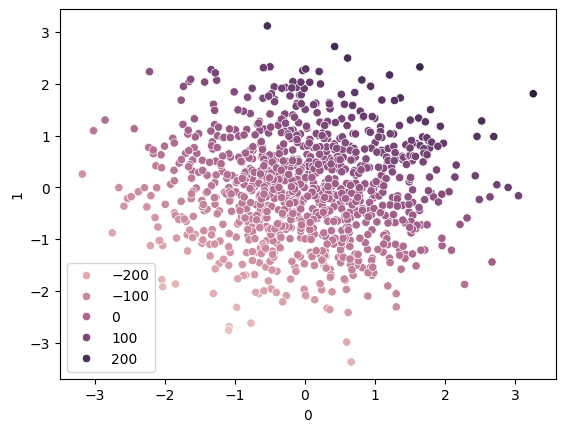

In [6]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
from sklearn.svm import SVR

In [10]:
svr=SVR(kernel='linear')

In [11]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [12]:
svr.coef_

array([[44.43433028, 73.18836903]])

In [13]:
y_pred=svr.predict(X_test)

In [14]:
from sklearn.metrics import r2_score

In [15]:
# Accuracy (R2 Score)
print(r2_score(y_test,y_pred))

0.9987162513069949


#### Hyperparameter Tuning with SVR

In [16]:
from sklearn.model_selection import GridSearchCV

In [18]:
parameter= {
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['linear'],
    'epsilon':[0.1,0.2,0.3]
}

In [19]:
grid=GridSearchCV(SVR(),param_grid=parameter,refit=True,cv=5,verbose=3)

In [20]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.830 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.831 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.815 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.809 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.813 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.830 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.831 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.815 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.809 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.813 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [22]:
grid.best_params_

{'C': 1000, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [23]:
y_pred_grid=grid.predict(X_test)

In [24]:
# Accuracy Score (R2 Score)
r2_score(y_test,y_pred)

0.9987162513069949